In [2]:
import pandas as pd

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
import os

In [5]:
os.getcwd()

'C:\\Users\\Vritika\\Documents\\PYTHON\\Tutorial practices'

In [6]:
os.chdir('C:\\Users\\Vritika\\Documents\\PYTHON')

In [ ]:
data=pd.read_csv('P4-Section6-Homework-Dataset.csv')


In [7]:
data.head()


,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [8]:
data.columns=['Film','Genre','Critics','Audience','Budget','Year']

In [9]:
%matplotlib inline
plt.rcParams['figure.figsize']=8,4

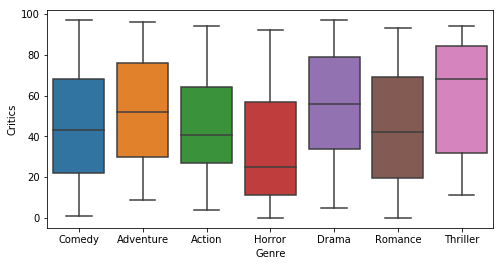

In [10]:
sns.boxplot(x='Genre',y='Critics',data=data)

In [11]:
import warnings
warnings.filterwarnings('ignore')

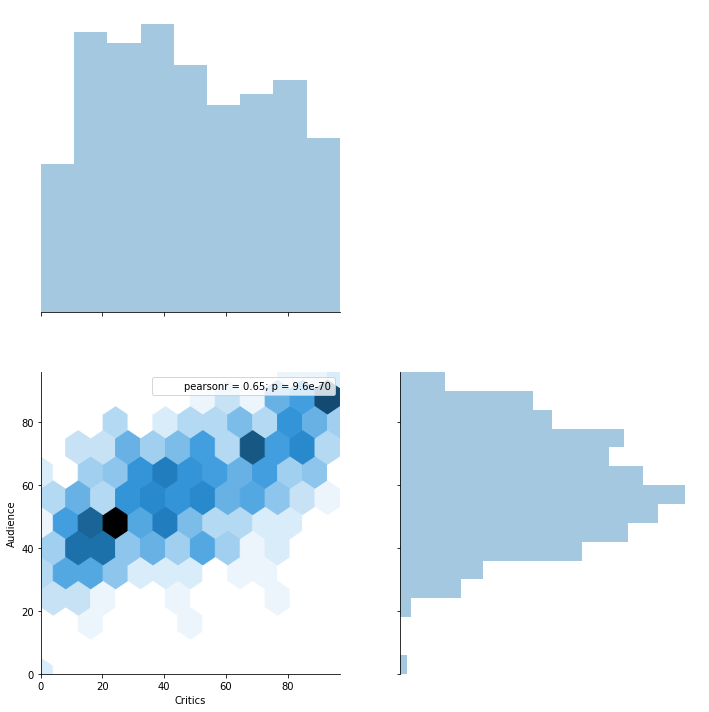

In [12]:
sns.jointplot(data=data,y='Audience',x='Critics',size=10,ratio=1,kind='hex')

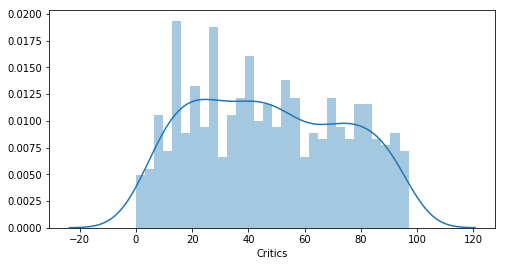

In [13]:
sns.distplot(data.Critics,bins=30)

(array([ 9., 10., 19., 13., 35., 16., 24., 17., 34., 12., 19., 22., 29.,
        18., 21., 17., 25., 22., 12., 16., 15., 22., 17., 15., 21., 21.,
        15., 14., 16., 13.]),
 array([ 0.        ,  3.23333333,  6.46666667,  9.7       , 12.93333333,
        16.16666667, 19.4       , 22.63333333, 25.86666667, 29.1       ,
        32.33333333, 35.56666667, 38.8       , 42.03333333, 45.26666667,
        48.5       , 51.73333333, 54.96666667, 58.2       , 61.43333333,
        64.66666667, 67.9       , 71.13333333, 74.36666667, 77.6       ,
        80.83333333, 84.06666667, 87.3       , 90.53333333, 93.76666667,
        97.        ]),
 <a list of 30 Patch objects>)

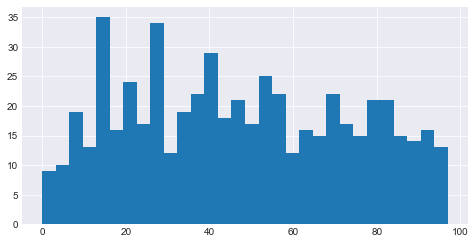

In [14]:
sns.set_style(style='darkgrid')
plt.hist(data.Critics,bins=30)

STACKED HISTOGRAMS

([array([25., 40., 18.,  8.,  6.,  2.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([32., 62., 45., 24., 14., 18., 10.,  5.,  7.,  6., 13.,  2.,  3.,
          8.,  1.,  2.,  1.,  1.,  0.,  1.])],
 array([  0.,  15.,  30.,  45.,  60.,  75.,  90., 105., 120., 135., 150.,
        165., 180., 195., 210., 225., 240., 255., 270., 285., 300.]),
 <a list of 2 Lists of Patches objects>)

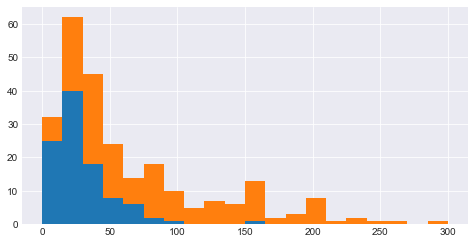

In [15]:
plt.hist([data[data.Genre=="Drama"].Budget,data[data.Genre=='Action'].Budget],stacked=True,bins=20)

In [16]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film        559 non-null object
Genre       559 non-null object
Critics     559 non-null int64
Audience    559 non-null int64
Budget      559 non-null int64
Year        559 non-null int64
dtypes: int64(4), object(2)
memory usage: 21.9+ KB


CONVERTING OBJECTS INTO A CATEGORY

In [17]:
data.Genre=data.Genre.astype('category')
data.Film=data.Film.astype('category')
data.Year=data.Year.astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film        559 non-null category
Genre       559 non-null category
Critics     559 non-null int64
Audience    559 non-null int64
Budget      559 non-null int64
Year        559 non-null category
dtypes: category(3), int64(3)
memory usage: 29.9 KB


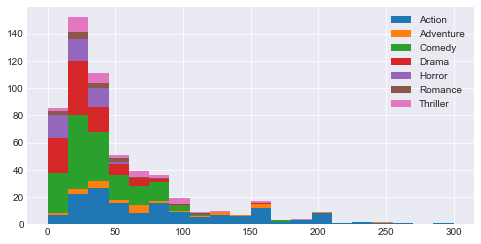

In [18]:
list1=[]
mylabels=[]
for name in data.Genre.cat.categories:
    list1.append(data[data.Genre==name].Budget)
    mylabels.append(name)
plt.hist(list1,bins=20,stacked=True,label=mylabels,rwidth=5)
plt.legend()
plt.show()



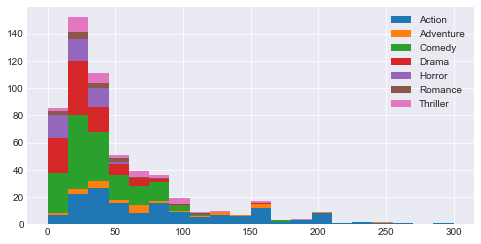

In [19]:
mylist=[]
mylabels=[]
for gen in data.Genre.cat.categories:
    mylist.append(data[data.Genre==gen].Budget)
    mylabels.append(gen)
plt.hist(mylist,stacked=True,label=mylabels,bins=20)
plt.legend()
plt.show()

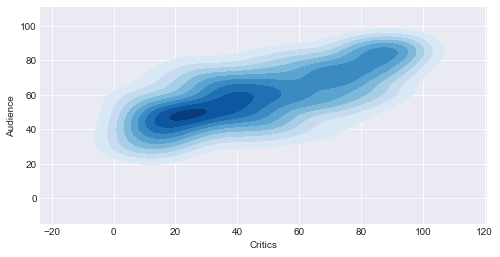

In [20]:
sns.kdeplot(data.Critics,data.Audience,cmap='Blues',shade=True,shade_lowest=False)

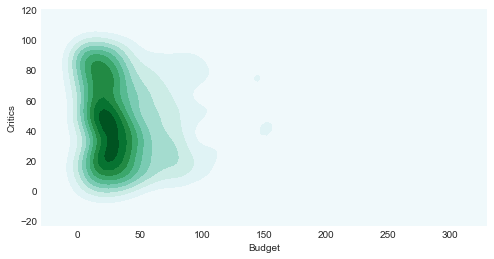

In [21]:
sns.kdeplot(data.Budget,data.Critics,shade=True)

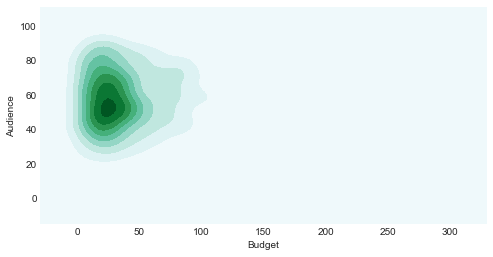

In [22]:
sns.kdeplot(data.Budget,data.Audience,shade=True)

SUBPLOTS

[(-20, 110), (-20, 170)]

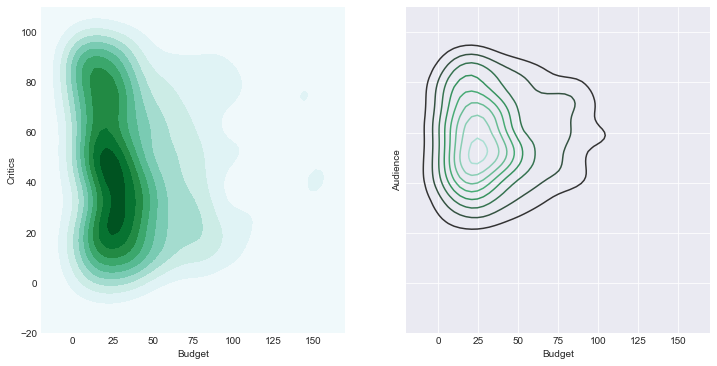

In [39]:
f,axes=plt.subplots(1,2,figsize=(12,6),sharex=True,sharey=True)
k1=sns.kdeplot(data.Budget,data.Critics,ax=axes[0],shade=True)
k2=sns.kdeplot(data.Budget,data.Audience,ax=axes[1])
k1.set(xlim=(-20,170),ylim=(-20,110))

VIOLINPLOTS VS BOXPLOTS

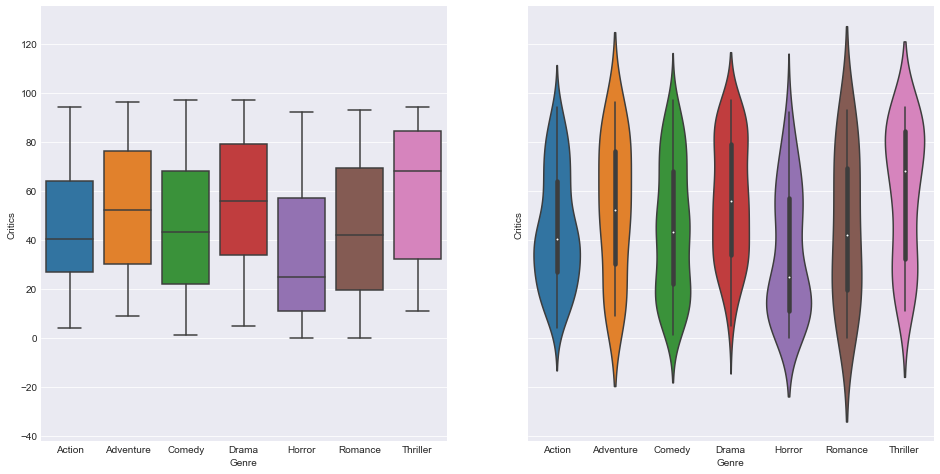

In [48]:
f,axes=plt.subplots(1,2,figsize=(16,8),sharex=True,sharey=True)
sns.boxplot(data=data,x='Genre',y='Critics',ax=axes[0])
sns.violinplot(data=data,x='Genre',y='Critics',ax=axes[1])

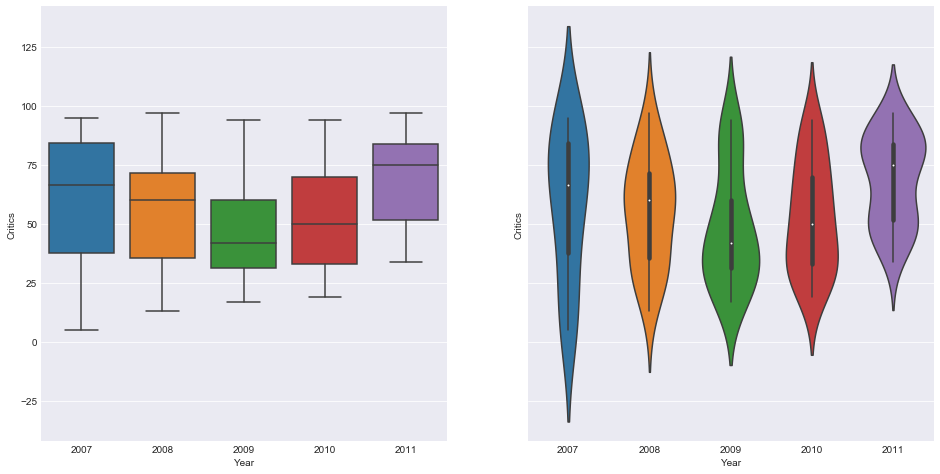

In [50]:
f,axes=plt.subplots(1,2,figsize=(16,8),sharex=True,sharey=True)
sns.boxplot(data=data[data.Genre=='Drama'],x='Year',y='Critics',ax=axes[0])
sns.violinplot(data=data[data.Genre=='Drama'],x='Year',y='Critics',ax=axes[1])